<a href="https://colab.research.google.com/github/majorquev/DBDC_202010_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/Clase4/02_Visualizaciones_ggplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 3: Introducción a GGplot2 

**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Jorge Arévalo Labarca<br>
**E-mail ayudante:** jorge.arevalol@usach.cl

Ggplot es una librería basada en la gramática de gráficos, creadapor Wilkinson (2015). Básicamente la gramática de gráficos nos dice que un gráfico estadístico corresponde a un mapeo entre la data hacia atributos estéticos (como el color, forma o tamaño) de objetos geométricos (como puntos, líneas o barras).

## Referencias útiles

 * https://ggplot2.tidyverse.org/reference/index.html
 * https://r4ds.had.co.nz/data-visualisation.html
 * https://www.rdocumentation.org/packages/ggplot2/versions/3.3.0


## Cheatsheets
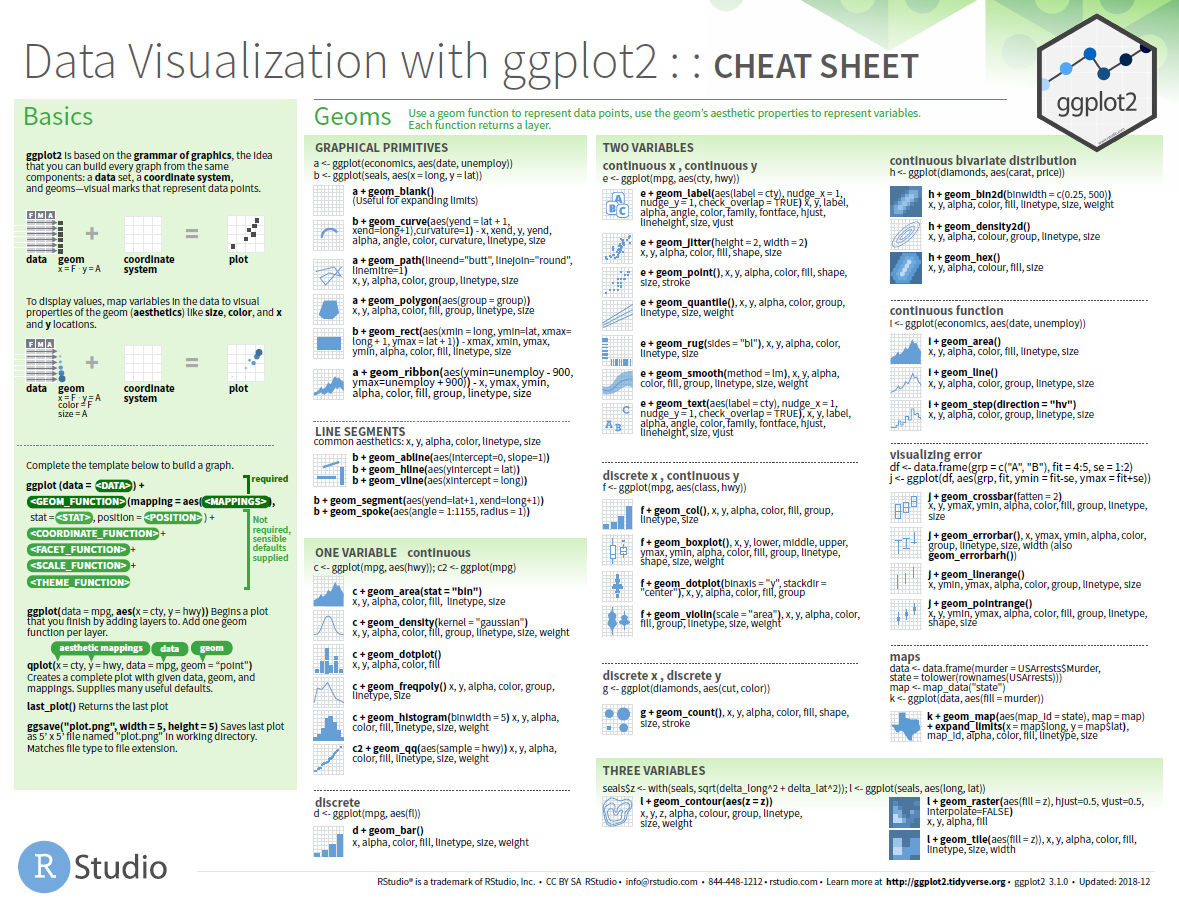


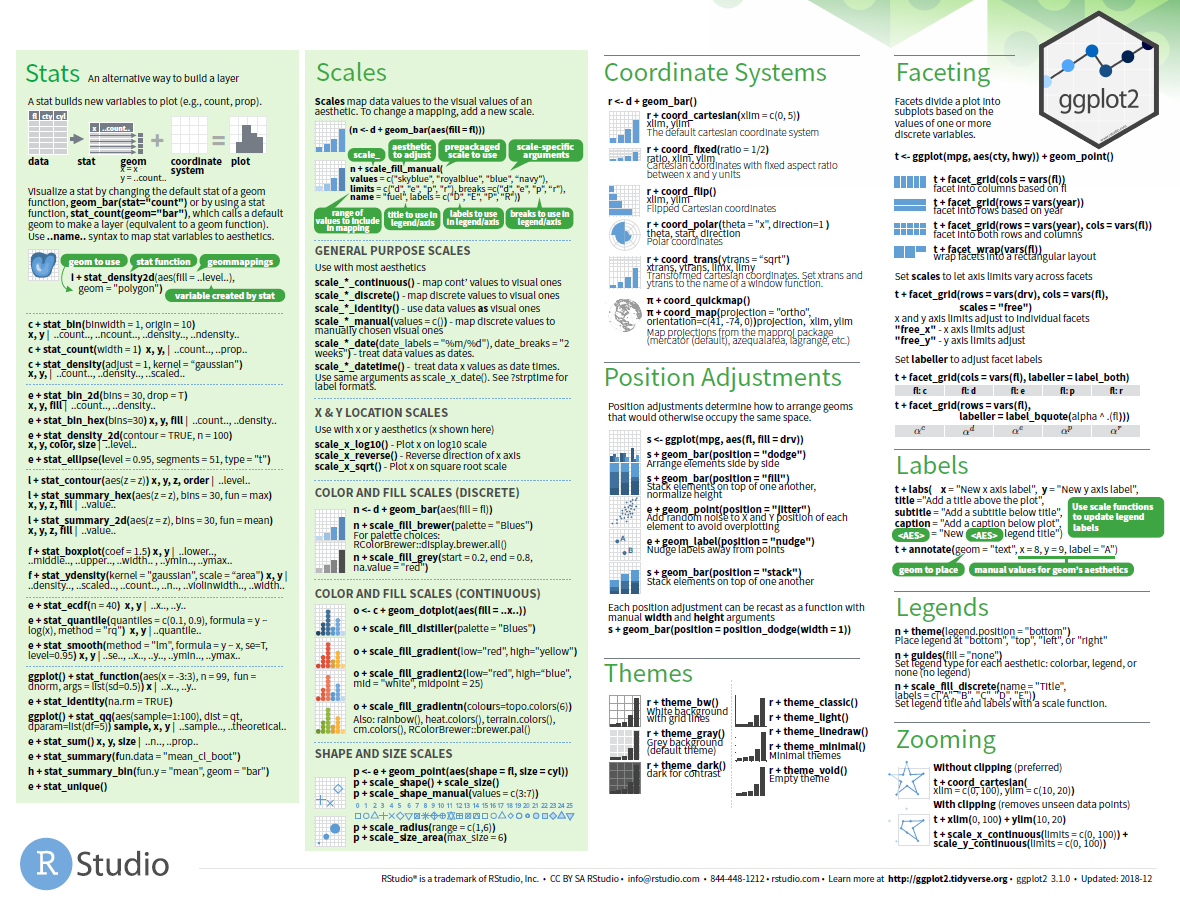


In [1]:
# Cargamos la librería
library(ggplot2) # install.packages("ggplot2")
# Otras librerías que pueden ser de interés: leaflet, iplots, highcharter * ,ggmap, visNetwork** 

In [ ]:
## Esta celda no es necesaria en Rstudio, es sólo para modificar el tamaño de los gráficos desplegados en el notebook
# Change plot size to 4 x 3
options(repr.plot.width=9, repr.plot.height=6)

Para entender el funcionamiento de esta grámatica comencemos con un ejemplo analizando la data mpg:

In [2]:
# "+" es mas o menos lo mismo en ggplot que %>% de dplyr
data(mpg)
mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


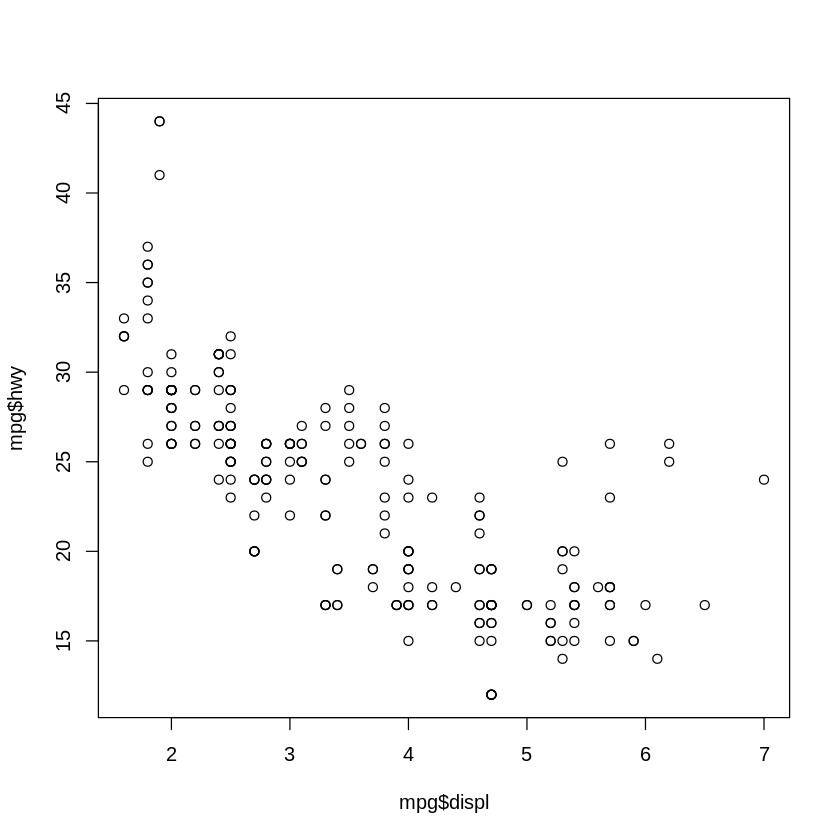

In [3]:
plot(mpg$displ, mpg$hwy)# esto es base, no es ggplot

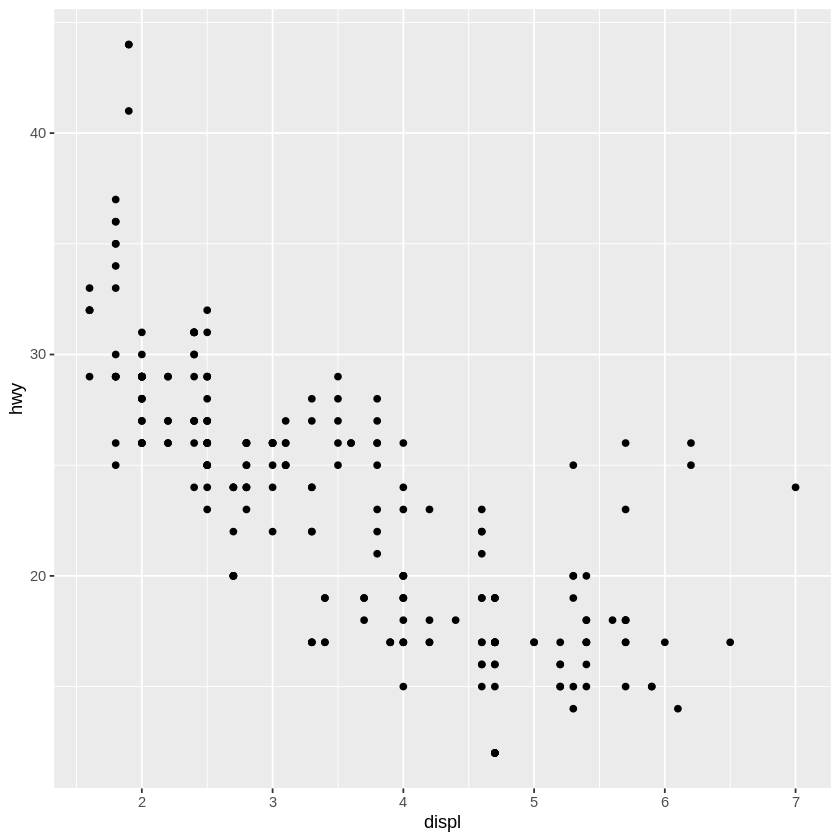

In [6]:
ggplot(mpg) + # Indicamos el origen de los datos que buscamos visualizar
    aes(x = displ, y = hwy) + # capa "estética" : aesthetical mapping (indicamos qué variables queremos visualizar)
    geom_point() # capa geométrica, se indica "cómo" queremos visualizar las variables indicadas en el aesthetical mapping 

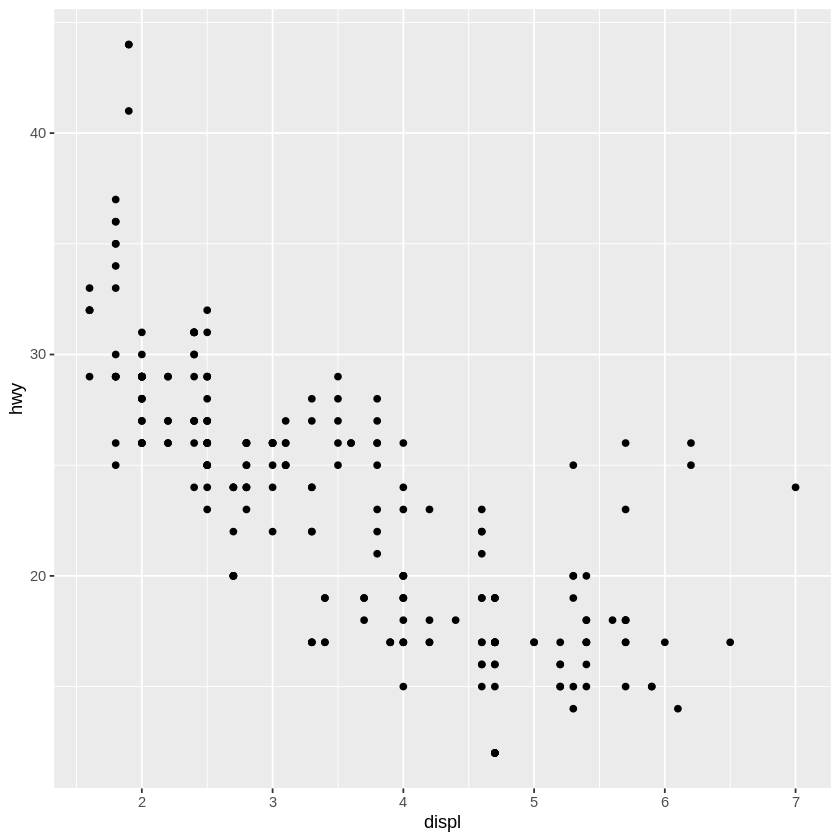

In [7]:
# tambien podemos generar el gráfico de la siguiente manera (aes( coo parametro mapping))
ggplot(mpg, mapping = aes(x = displ, y = hwy)) + 
    geom_point() 

# I. Color, tamaño, forma y otros atributos estéticos

## I.1. Color
El color está dado por la variable categórica class (notar que es lo mismo si incluimos el parámetro color, colour o col. ggplot automáticamente entiende lo que queremos :) )

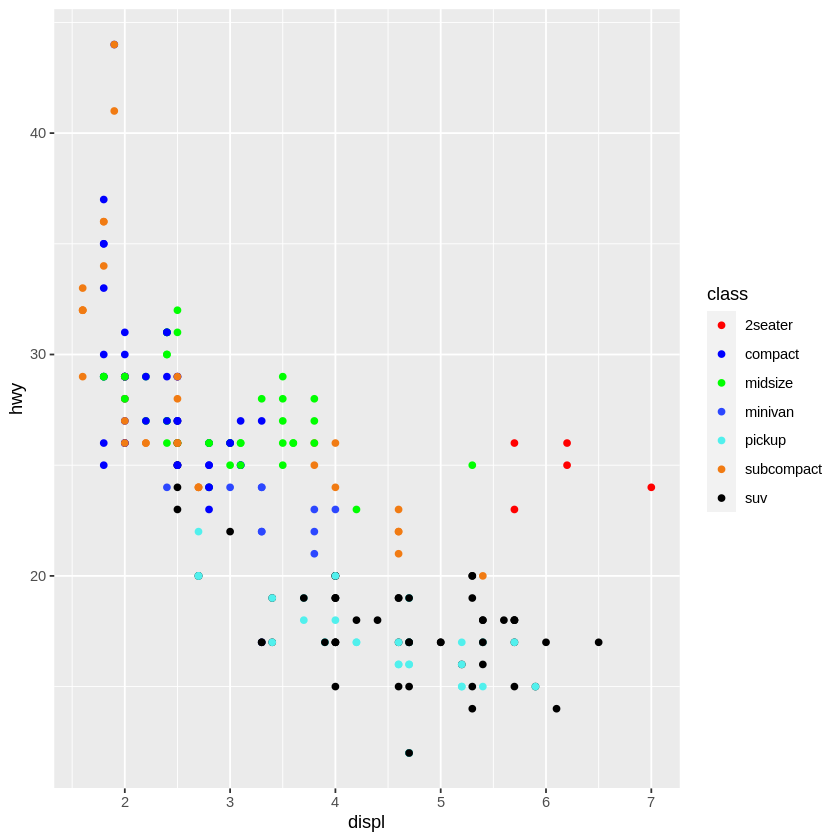

In [20]:
## Color por "class" dentro de aes
ggplot(mpg) + # Indicamos el origen de los datos que buscamos visualizar
    aes(x = displ, y = hwy, color = class) + # capa "estética" : aesthetical mapping (indicamos qué variables queremos visualizar)
    geom_point() +
    scale_colour_manual(values = c("red", "blue", "green","#2C47FF", "#51F0ED","#F17B13","black"))

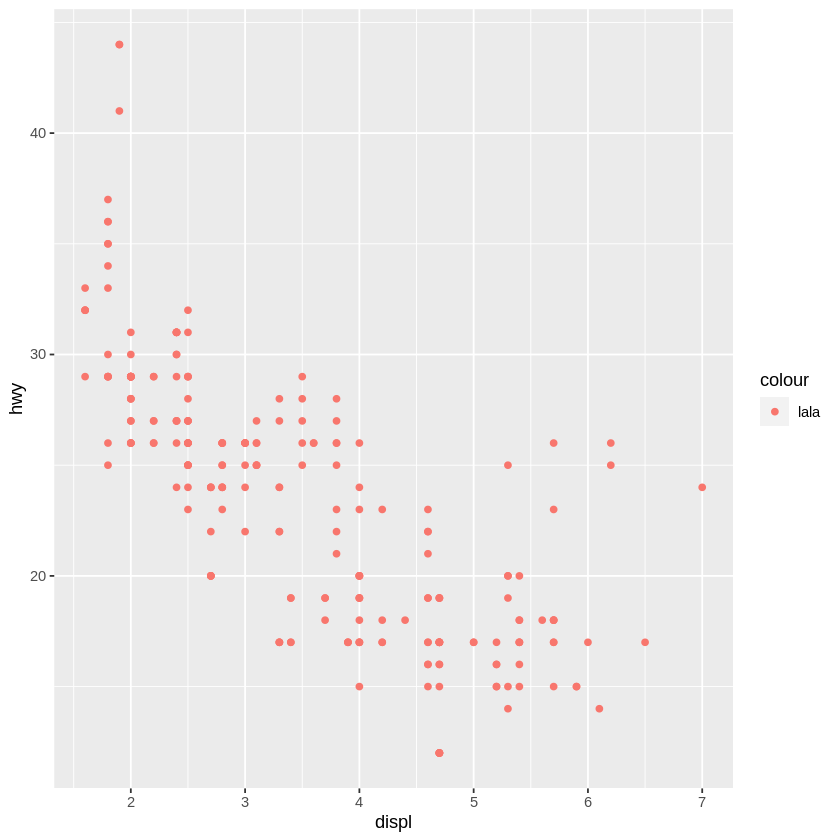

In [12]:
#y si queremos color azul?

ggplot(mpg) + 
    aes(x = displ, y = hwy, color = "lala") + ##2C47FF
    geom_point()


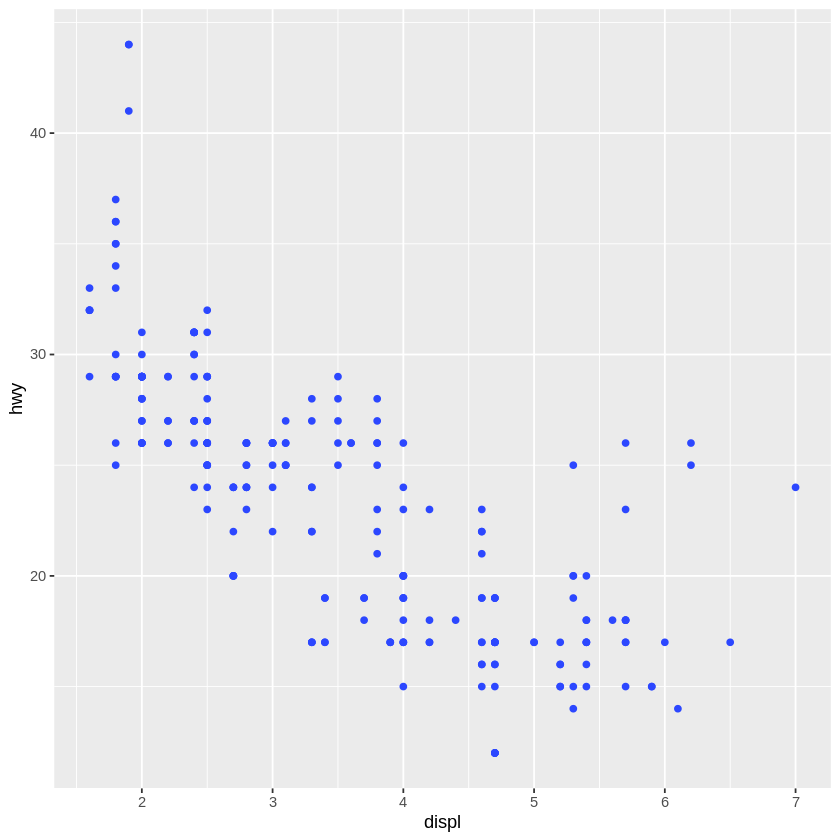

In [13]:
ggplot(mpg) + 
    aes(x = displ, y = hwy) + ##2C47FF
    geom_point(color = "#2C47FF")

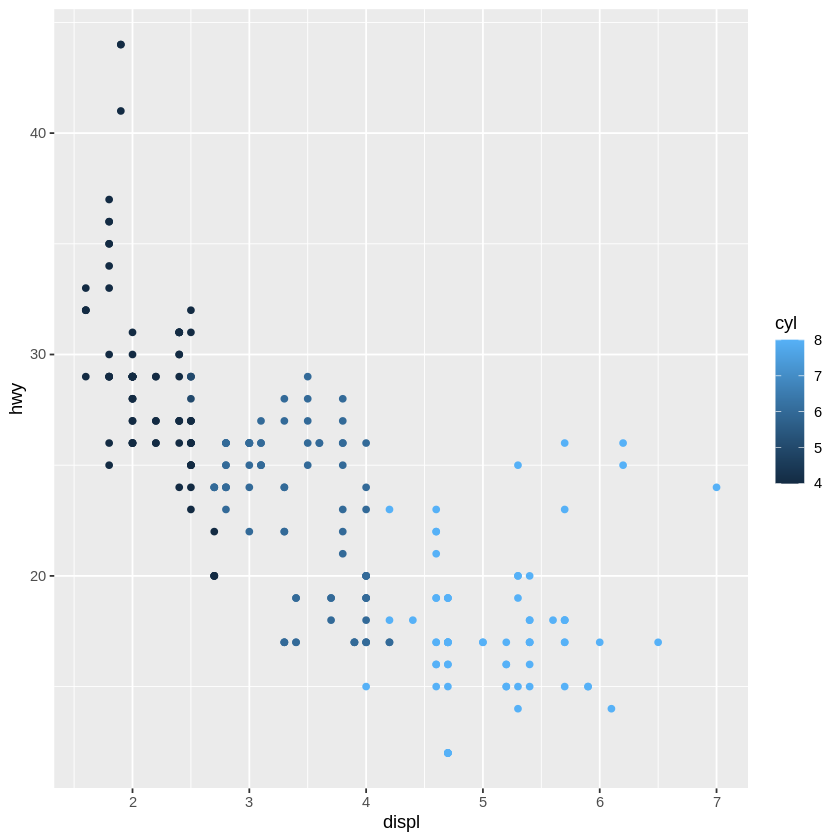

In [16]:
# que sucede si el color no es una variable discreta (categórica)
ggplot(mpg) + 
    aes(x = displ, y = hwy, color = cyl) + 
    geom_point() 


## I.2. Forma

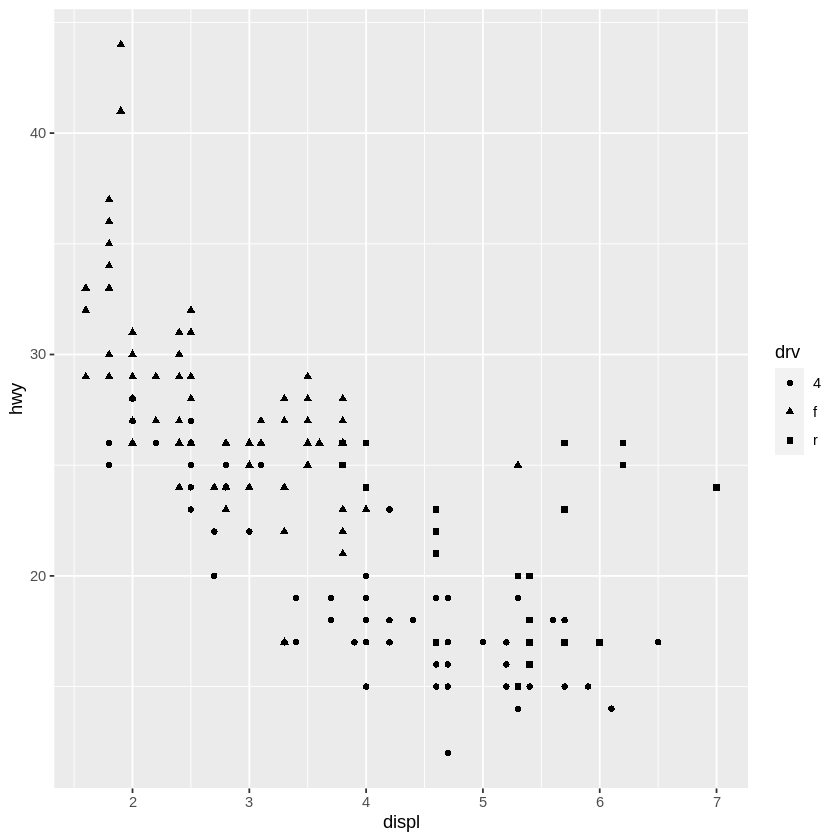

In [17]:
## Forma (shape) según "drv"
ggplot(mpg) + 
    aes(x = displ, y = hwy, color = cyl) + 
    geom_point() 

## I.3. Forma y color

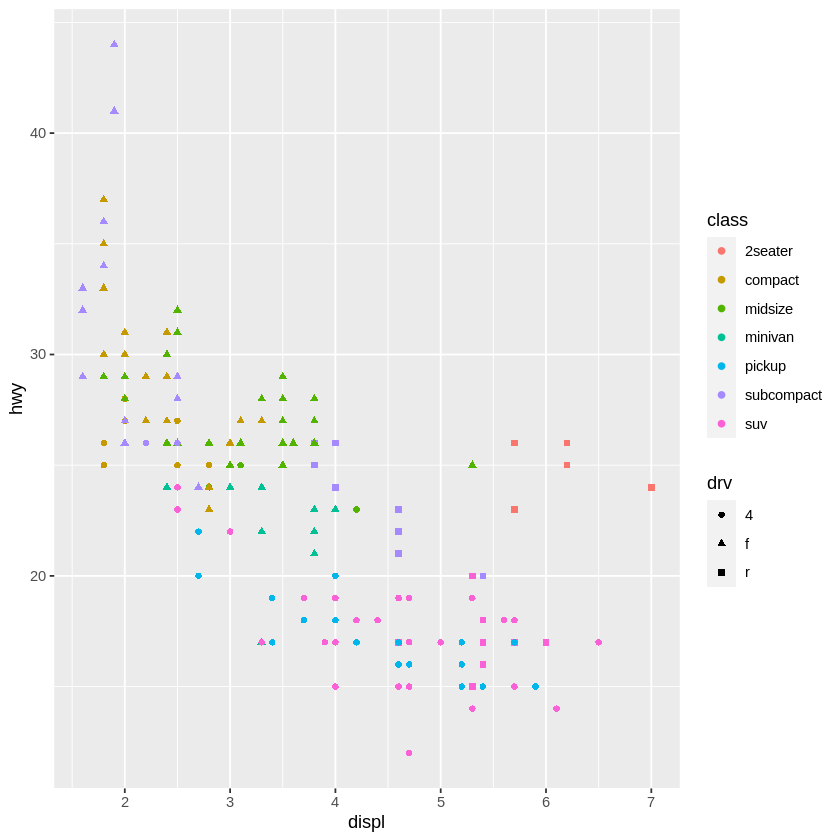

In [18]:
## Forma y color (color = class, shape = drv)
ggplot(mpg) + 
    aes(x = displ, y = hwy, color = class, shape = drv) + 
    geom_point() 

## I.4. Tamaño

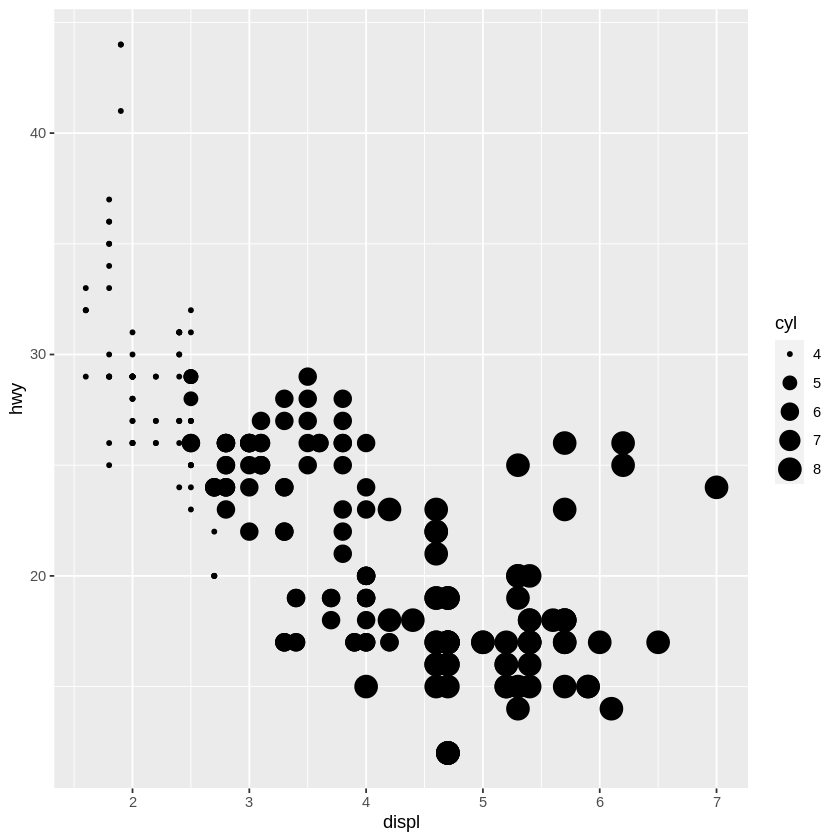

In [19]:
## Tamaño (size) según "cyl"
ggplot(mpg) + 
    aes(x = displ, y = hwy, size = cyl) + 
    geom_point() 

Warning message:
“Using size for a discrete variable is not advised.”


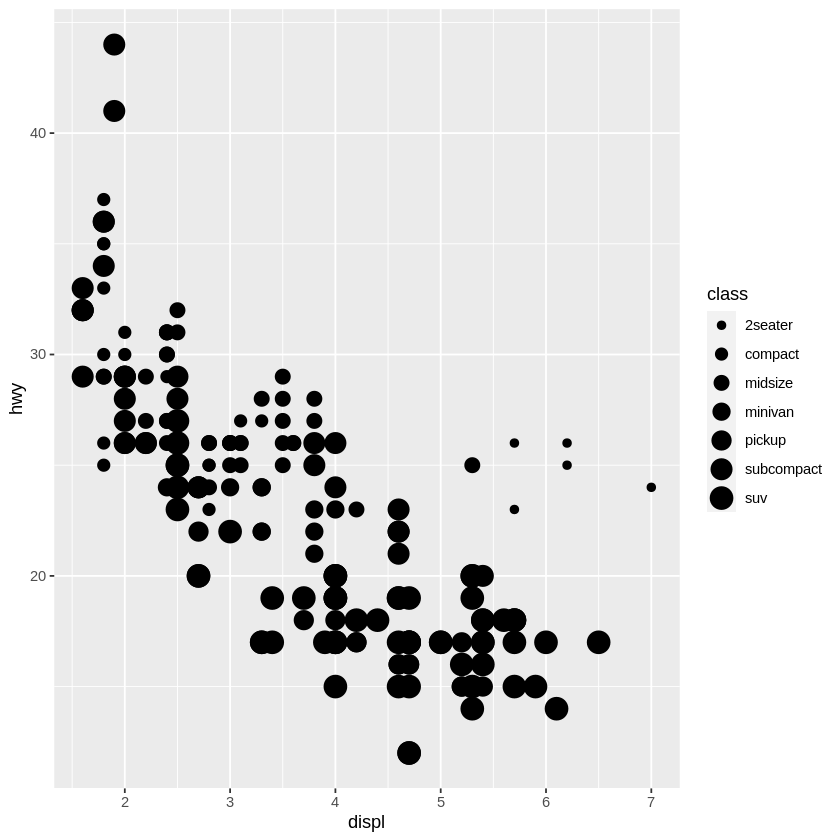

In [21]:
# size = drv? nota: no tiene sentido dar el tamaño segú nuna variable categórica (R internamente la ordena alfabéticamente y luego asigna el valor del tamañao)
ggplot(mpg) + 
    aes(x = displ, y = hwy, size = class) + 
    geom_point() 

# II. Facetas

En inglés Facetting, es una manera de dividir la data disponible según variables categóricas y mostrar el mismo gráfico por cada categoría en una misma imagen.

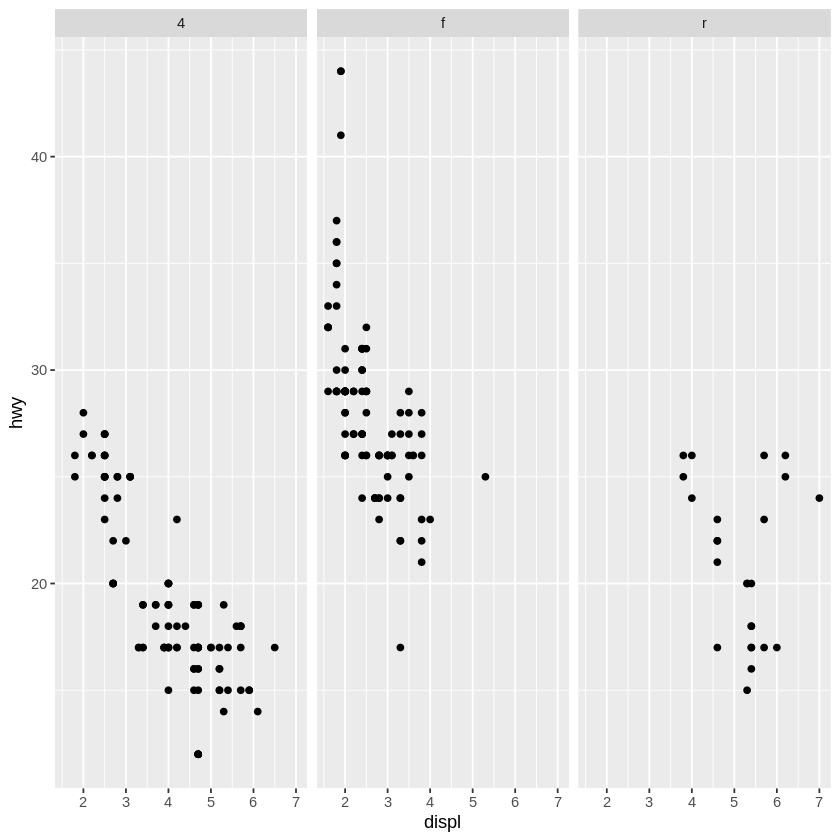

In [23]:
# Apertura por drv
ggplot(mpg) +
  aes(x = displ,y = hwy) +
  geom_point() +
  facet_wrap(~ drv) # le decimos a R que aperture el gráfico anterior por cada categoría dada en la variable drv

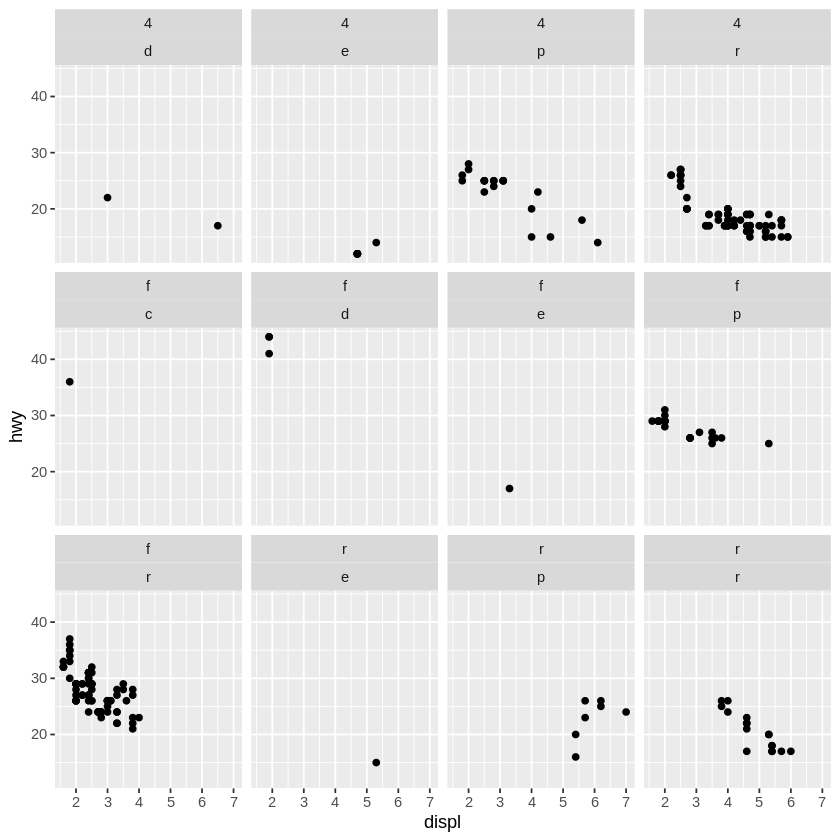

In [24]:
ggplot(mpg) +
  aes(x = displ,y = hwy) +
  geom_point() +
  facet_wrap(~ drv + fl) # le decimos a R que aperture el gráfico anterior por cada combinación de las categorías dadas en las variables drv y fl

Grafique otras relaciones entre la eficiencia (hwy o cty), tamaño del motor (displ) por cada  número de cilindros (cyl). ¿Qué se observa?

In [ ]:
# Por ejemplo, x=displ,y=hwy , aperturado por número de cilindros
ggplot(mpg) +
  aes(x = displ,y = hwy) +
  geom_point() 

# III. Capas geométricas: prefijo geom_

Hasta aquí hemos utilizado sólo una de las diversas maneras de mostrar (geométricamente hablando) la relación entre las variables hasta aquí descritas.
En ggplot existe una gran variedad de funciones "geom_", sólo veremos algunas de ellas, aunque en la documentación oficial se describen todas las opciones disponibles https://ggplot2.tidyverse.org/index.html

## III.1 geom_point()

La fución geom_point() se encarga de visualizar las variables definidas en aes() como un gráfico de dispersión. 

## III.2 geom_smooth()
Con esta función podemos añadir una curva de tendencia a nuestros datos


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



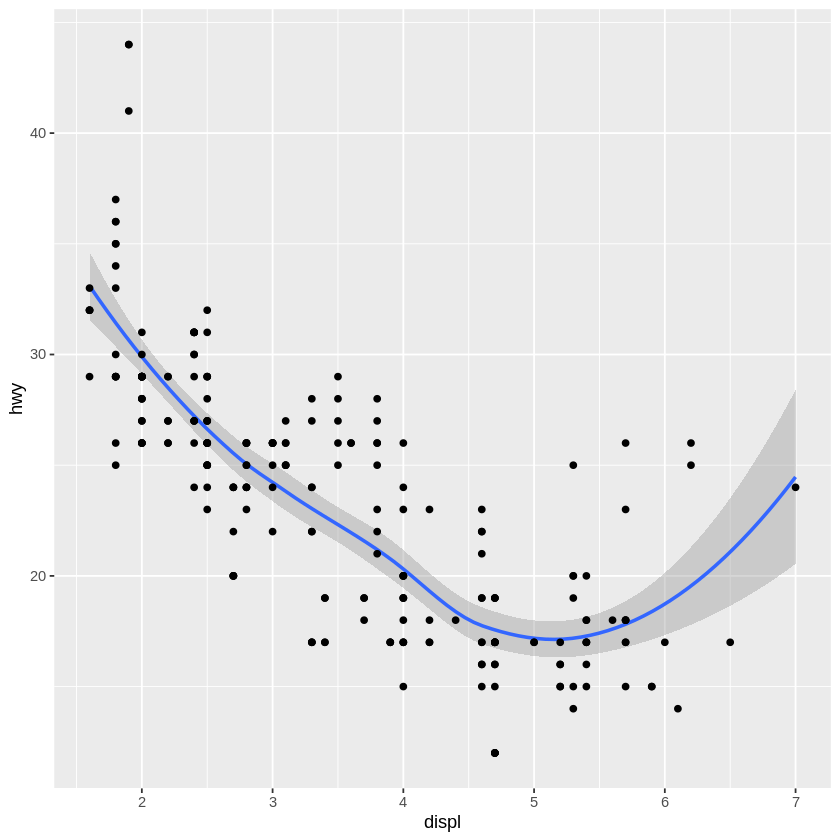

In [29]:
#geom_smooth()

ggplot(mpg) +
  aes(x = displ,y = hwy) +
  geom_smooth() +
  geom_point() 



In [ ]:
?geom_smooth


¿Cómo podemos graficar las curvas de tendencia para cada tipo de tracción (drv)?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



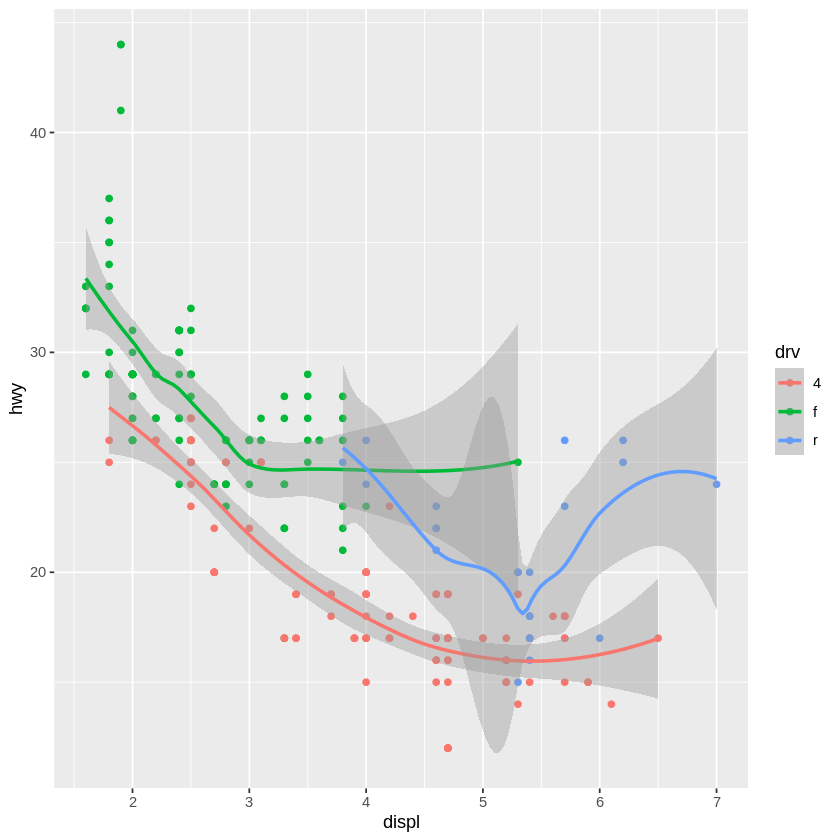

In [30]:
# por color
ggplot(mpg) +
  aes(x = displ,y = hwy, color = drv) +
  geom_point() +
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



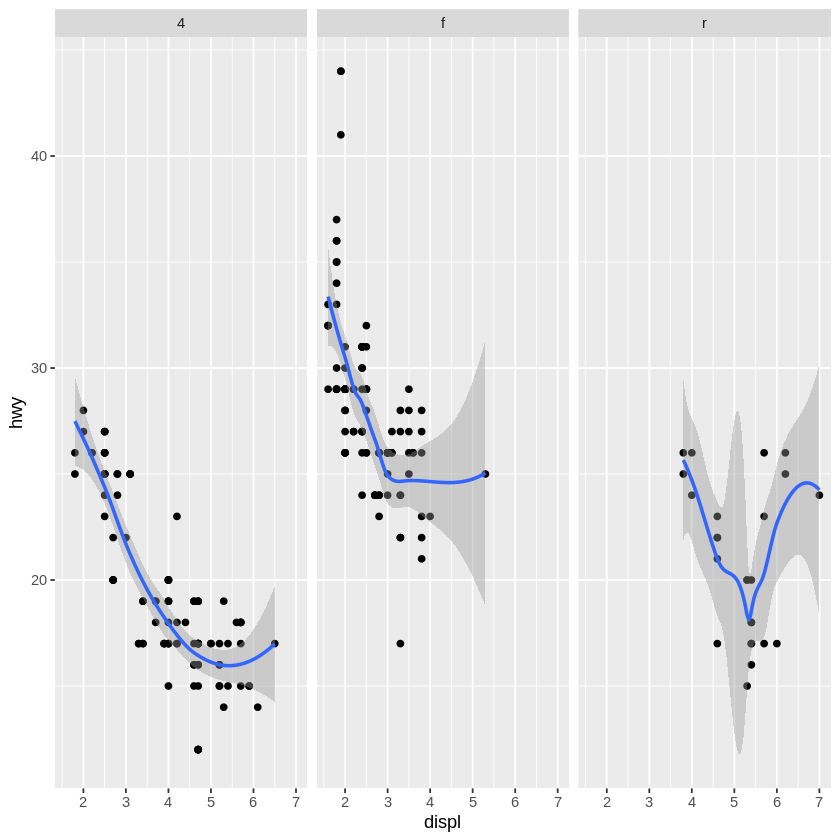

In [31]:
# y usando facet_wrap
ggplot(mpg) +
  aes(x = displ,y = hwy) +
  geom_point() +
  geom_smooth() +
  facet_wrap(~ drv)

## III.3 geom_boxplot() y geom_jitter()
 Podemos variar la forma del gráfico modificando la capa geométrica con las funciones geom_
 Por ejemplo, hace un rato visualizamos la relación entre hwy y drv. Para este tipo de relaciones es más informativo un gráfico de cajas.

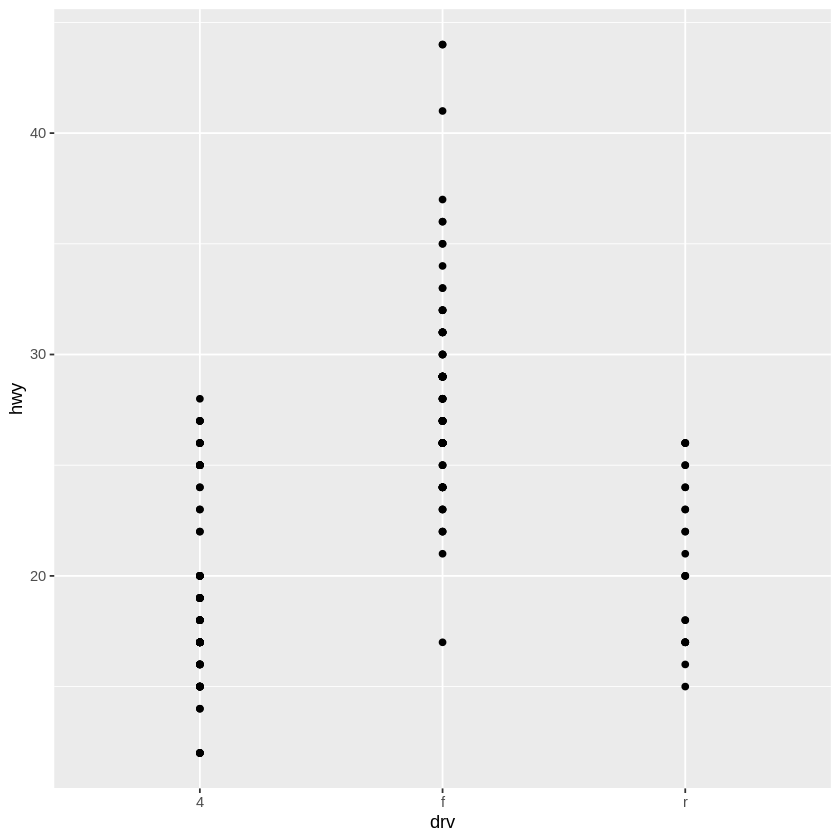

In [32]:
ggplot(mpg) + 
aes(x =  drv ,y = hwy ) +
  geom_point() 

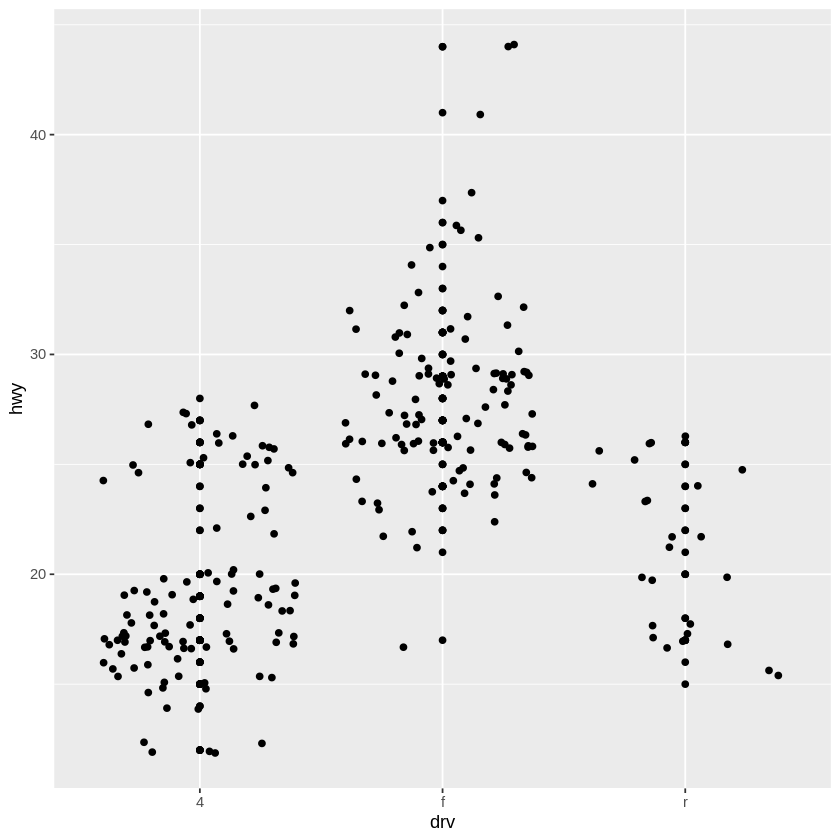

In [33]:
# usar capa geom_jitter(). Añade un grado de dispersión entre ellos los puntos de un gráfico de dispersión para una mejor visualización.
ggplot(mpg) +
  aes(x =  drv ,y = hwy) +
  geom_point() +
  geom_jitter()


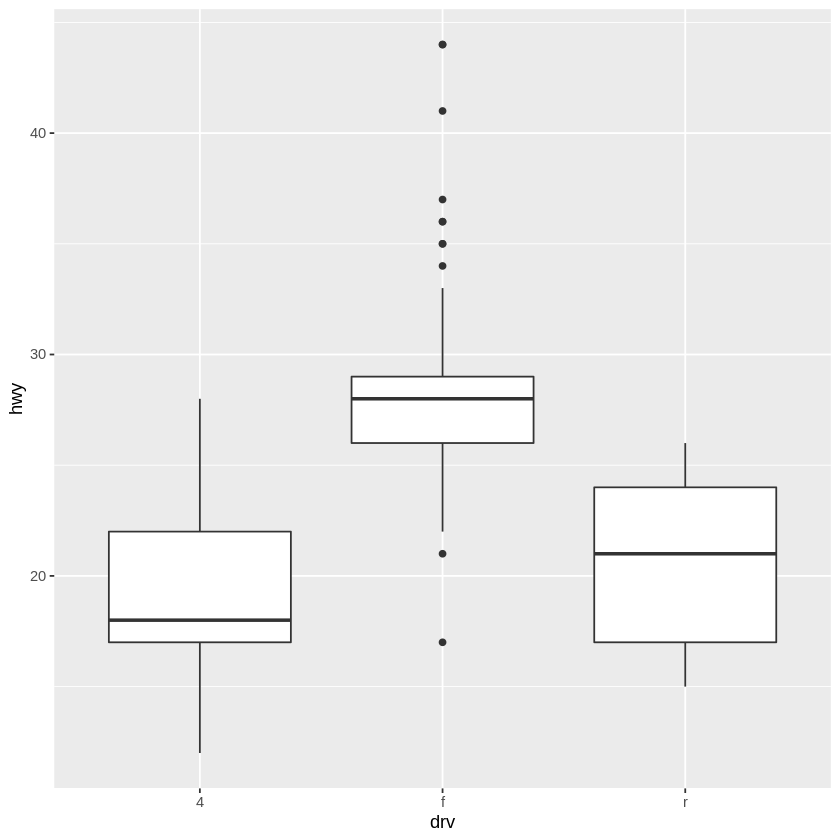

In [34]:
## usar capa geom_boxplot()
ggplot(mpg) +
  aes(x =  drv ,y = hwy) +
  geom_boxplot()



In [36]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [42]:
# Rango intercuartílico y outliers
mpg %>%
  group_by(drv) %>%
  mutate(Q1 = quantile(hwy,0.25),
         Q3 = quantile(hwy,0.75),
         IQR = Q3-Q1 ) %>%
  filter(hwy > Q3 + 1.5*IQR | hwy < Q1 - 1.5*IQR )




manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,Q1,Q3,IQR
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan,26,29,3
dodge,caravan 2wd,3.8,1999,6,auto(l4),f,15,21,r,minivan,26,29,3
honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact,26,29,3
honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,26,29,3
honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact,26,29,3
toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,26,29,3
toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,26,29,3
toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,26,29,3
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,26,29,3


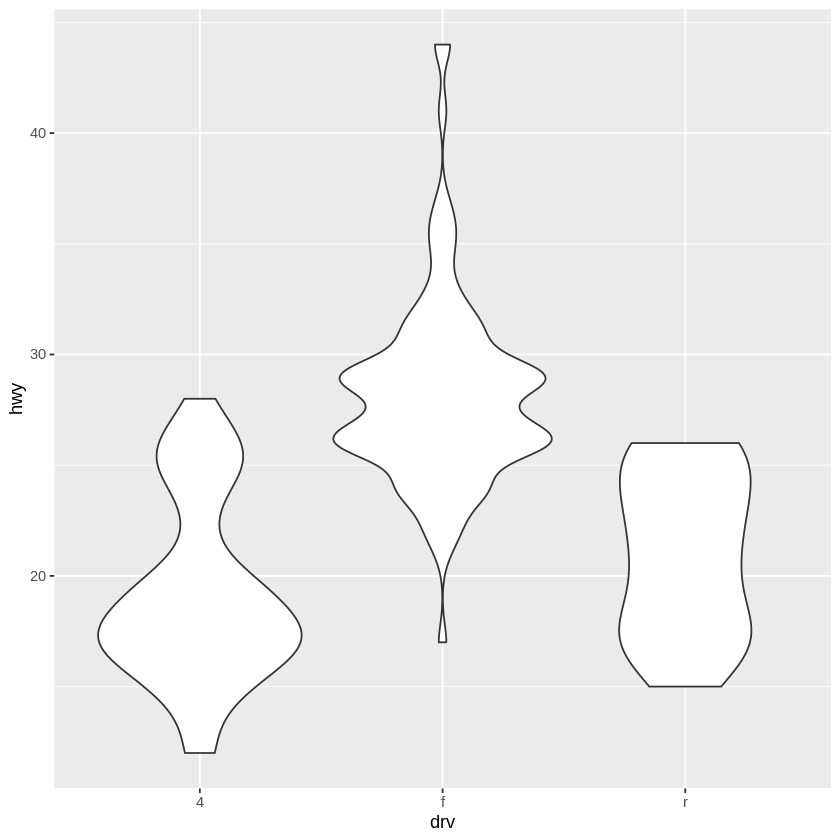

In [43]:
# usar capa geom_violin(). Proporciona una estimaciónd de la deensidad de los valores graficados

ggplot(mpg) +
  aes(x =  drv ,y = hwy) +
  geom_violin()

## III.4 geom_histogram() y  geom_freqpoly() 

Con estas funciones es posible graficar histogramas y la frecuencia absoluta a través de una curva poligonal

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



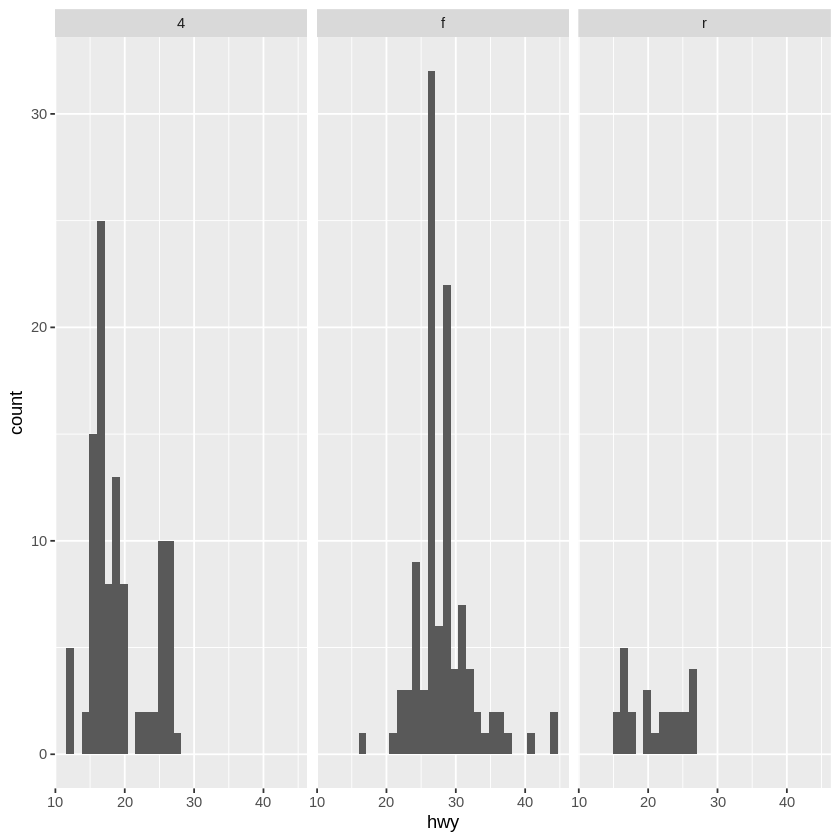

In [45]:
## histograma . Parámetro bins =30 en geom_histogram()

ggplot(mpg) +
  aes(x = hwy) +
  geom_histogram() + 
  facet_wrap( ~ drv) # demanda ~ precio + tipo_prod

In [ ]:
# Con base
hist(mpg$hwy, breaks = 30)

In [ ]:
# podemos aperturar por drv (en color  y fill)
ggplot(mpg) +
  aes(x = hwy) +
  geom_histogram() 

#usando facet_wrap

ggplot(mpg) +
  aes(x = hwy) +
  geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



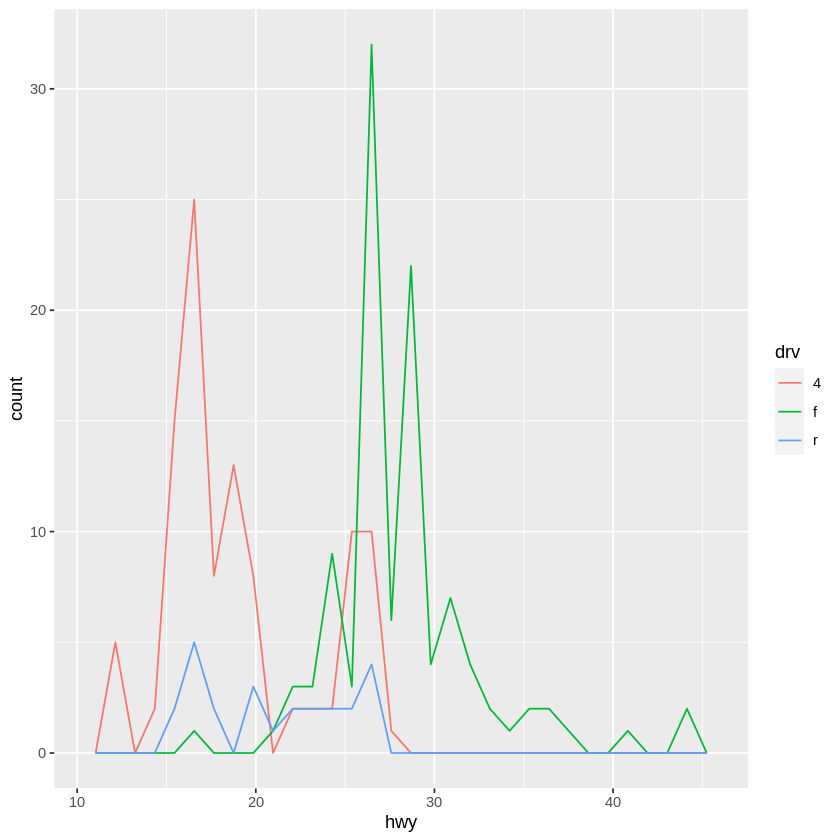

In [46]:
## polígono de frecuencias # geom_freqpoly
ggplot(mpg) +
  aes(x = hwy, color = drv) +
  geom_freqpoly()


## III.4 geom_line() 

Podemos generar gráficos de linea, por ejemplo de series temporales.










In [ ]:
library(dplyr)
library(httr)
library(jsonlite)
library(ggplot2)

url_base <-"https://mindicador.cl"

consulta <- GET(url_base,path = "/api/dolar/2020")
consulta

text <- content(consulta, as = "text")
content <- fromJSON(text)
content$serie

# IV. Otros parámetros visuales
## IV.1 Etiquetas
Con la capa llamada `labs()`, podemos modificar los nombres de los ejes, títulos, subtítulos y leyenda.
## IV.2 Ejes y escala
Existen diversas funciones que nos peritirán modificar parámetros visuales de los ejes, en función del tipo de dato que estos representen. Algunos de los más usuales son los siguientes
 * `scale_x_date()`, `scale_y_date()`
 * `scale_x_continuous()`, `scale_y_continuous()`
 * `scale_x_discrete()`, `scale_y_discrete()`
 * `scale_x_log10()`, `scale_y_log10()`

En la documentación pueden buscar las demmás opcione mediante el prefijo _scale_



In [ ]:
## Ejemplo, consideramos incluir etiquetas y cortes en el eje de tiempo
